In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler,normalize
import data_manipulation as dm

Preparing toy data-set

In [2]:
b_name='Input_Background_1.csv'

background = np.genfromtxt(b_name, delimiter=',')
background = background[1:,:]
print("     .Background Loaded...")

s_name='Input_Signal_1.csv'

signal = np.genfromtxt(s_name, delimiter=',')
signal = signal[1:,:]
print("     .Signal Loaded...")

     .Background Loaded...
     .Signal Loaded...


In [23]:
background, _ = dm.divide(background, 100, 750)
signal, _ = dm.divide(signal, 100, 750)

In [24]:
#Standadization

scaler = StandardScaler().fit(background)
std_background = scaler.transform(background)

std_signal = scaler.transform(signal)

In [25]:
X = np.vstack((background,signal))
y = []
for i in range(len(background)):y.append(0)
for i in range(len(signal)):y.append(1)  
y = np.array(y)

In [26]:
# Normalization

norm_background = normalize(background)
norm_signal = normalize(signal)

In [27]:
# Normalization

norm_std_background = normalize(std_background)
norm_std_signal = normalize(std_signal)

In [28]:
norm_X = np.vstack((norm_background,norm_signal))
norm_std_X = np.vstack((norm_std_background,norm_std_signal))
std_X = np.vstack((std_background,std_signal))

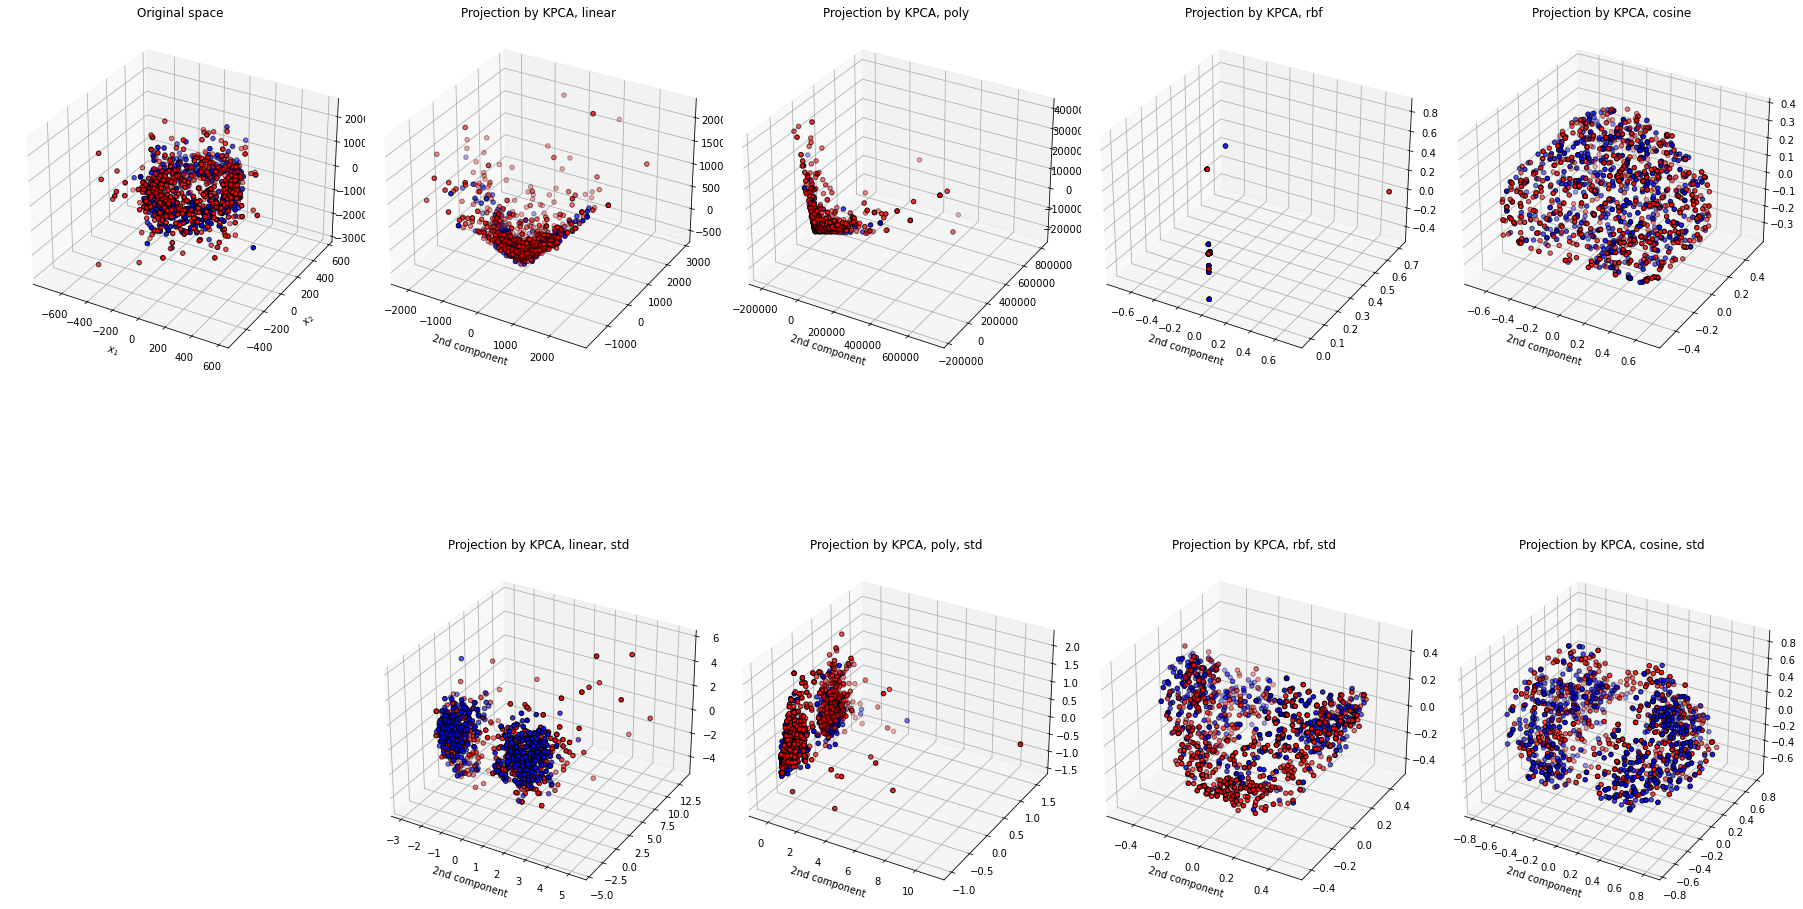

In [37]:
#%matplotlib
# definin loop structure for kernels
kernels = ['linear', 'poly', 'rbf', 'cosine']#'sigmoid', 'precomputed'

fig = plt.figure(figsize=(25,16))
#ax = fig.add_subplot(4, 5, 1, projection='3d')
ax = fig.add_subplot(2, 5, 1, projection='3d')
ax.set_title("Original space")
reds = y == 0
blues = y == 1

ax.scatter(X[reds, 0], X[reds, 1], X[reds, 2], c="red",
            s=20, edgecolor='k')
ax.scatter(X[blues, 0], X[blues, 1], X[blues, 2], c="blue",
            s=20, edgecolor='k')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")


for i,knl in enumerate(kernels):
    
    if knl in ['poly']:
        kpca = KernelPCA(kernel=knl, degree=2, n_components=3)
    else:
        kpca = KernelPCA(kernel=knl, n_components=3)
        
    X_kpca = kpca.fit_transform(X)
    std_X_kpca = kpca.fit_transform(std_X)
    norm_X_kpca = kpca.fit_transform(norm_X)
    norm_std_X_kpca = kpca.fit_transform(norm_std_X)

    # Plot result

    #ax = fig.add_subplot(4, 5, i+2, projection='3d')
    ax = fig.add_subplot(2, 5, i+2, projection='3d')
    ax.scatter(X_kpca[reds, 0], X_kpca[reds, 1], X_kpca[reds, 2], c="red",
                s=20, edgecolor='k')
    ax.scatter(X_kpca[blues, 0], X_kpca[blues, 1], X_kpca[blues, 2], c="blue",
                s=20, edgecolor='k')
    ax.set_title("Projection by KPCA, " + knl)
    ax.set_xlabel(r"1st principal component")
    ax.set_xlabel("2nd component")
    
    # Plot result

    ax = fig.add_subplot(2, 5, i+7, projection='3d')
    ax.scatter(std_X_kpca[reds, 0], std_X_kpca[reds, 1], std_X_kpca[reds, 2], c="red",
                s=20, edgecolor='k')
    ax.scatter(std_X_kpca[blues, 0], std_X_kpca[blues, 1], std_X_kpca[blues, 2], c="blue",
                s=20, edgecolor='k')
    ax.set_title("Projection by KPCA, " + knl + ', std')
    ax.set_xlabel(r"1st principal component")
    ax.set_xlabel("2nd component")

plt.tight_layout()
plt.show()

In [30]:
xyz_background = dm.statistics_attributes(background)
xyz_signal = dm.statistics_attributes(signal)

In [31]:
#Standadization

scaler = StandardScaler().fit(xyz_background)
std_xyz_background = scaler.transform(xyz_background)

std_xyz_signal = scaler.transform(xyz_signal)

In [32]:
xyz_X = np.vstack((xyz_background,xyz_signal))
std_xyz_X = np.vstack((std_xyz_background,std_xyz_signal))

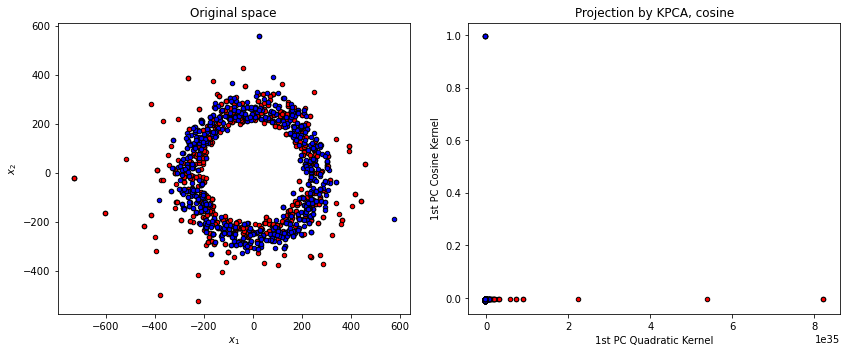

In [36]:
# training PCA for comparison 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# definin loop structure for kernels
kernels = ['linear', 'poly', 'rbf', 'cosine']#'sigmoid', 'precomputed'


plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1, aspect='equal')
plt.title("Original space")

plt.scatter(xyz_X[reds, 0], xyz_X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


X_kpca = KernelPCA(kernel='poly', degree=3, n_components=1)
Y_kpca = KernelPCA(kernel='rbf', n_components=1)
        
X_kpca = X_kpca.fit_transform(xyz_X)
Y_kpca = Y_kpca.fit_transform(xyz_X)

# Plot result

plt.subplot(1, 2, 2)
plt.scatter(X_kpca[reds, 0], Y_kpca[reds, 0], c="red",
                s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], Y_kpca[blues, 0], c="blue",
                s=20, edgecolor='k')
plt.title("Projection by KPCA, " + knl)
plt.xlabel(r"1st PC Quadratic Kernel")
plt.ylabel(r"1st PC Cosine Kernel")

plt.tight_layout()
plt.show()

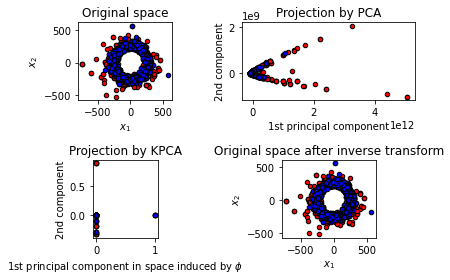

In [47]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=30,n_components=2)
X_kpca = kpca.fit_transform(xyz_X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(xyz_X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(xyz_X[reds, 0], xyz_X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(xyz_X[blues, 0], xyz_X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(2, 2, 2)
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()